# Classification algorithms

### Dataset description, visualisation, and pre-processing

<div class="alert alert-block alert-warning">The Heart Disease Detection dataset is composed of a set of characteristics used to determine if a patient has heart disease or not. Its main purpose is to perform classification based on the target variable, 'HeartDisease,' which indicates the presence of heart disease in the patient. This variable has integer values where 0 represents no disease and 1 indicates the presence of disease.
<div/>

<div class="alert alert-block alert-danger"> 
    
1. Import the Heart Disease Detection dataset.
2. Display and try to understand each feature in this dataset.
3. Display a summary of the dataset.
4. Verify if the dataset contains any missing values.
5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.
6. Apply dummy encoding to all categorical features in the dataset.
7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?
8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?
9. Split the data into a training and a testing set using a ratio of 0.3.
10. Normalize the data using z-score scaling.
<div/>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Import the Heart Disease Detection dataset.


In [2]:
dataset = pd.read_csv(('heart.csv'))

#### 2. Display and try to understand each feature in this dataset.


In [3]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The `dataset` contain the following features:
| Feature | Description |
| --- | --- |
| `Age` | Age of the patient. |
| `Sex` | Gender of the patient (***M*** for Male, ***F*** for Female). |
| `ChestPainType` | Type of chest pain (e.g., ATA, NAP, ASY, etc.). |
| `RestingBP` | Resting blood pressure (in mm Hg). |
| `Cholesterol` | Serum cholesterol level (in $mg/dl$). |
| `FastingBS` | Fasting blood sugar (`0 if <120 mg/dl, 1 if ≥120 mg/dl`). |
| `RestingECG` | Resting electrocardiographic results (e.g., Normal, ST, etc.). |
| `MaxHR` | Maximum heart rate achieved. |
| `ExerciseAngina` | Exercise-induced angina (***Y*** for Yes, ***N*** for No). |
| `Oldpeak` | Depression induced by exercise relative to rest. |
| `ST_Slope` | Slope of the peak exercise ST segment (e.g., Up, Flat, Down). |
| `HeartDisease` | Target variable ($1$ for presence of heart disease, $0$ for absence). |


#### 3. Display a summary of the dataset.


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### 4. Verify if the dataset contains any missing values.


In [14]:
dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The dataset does not contains any missing values

#### 5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.


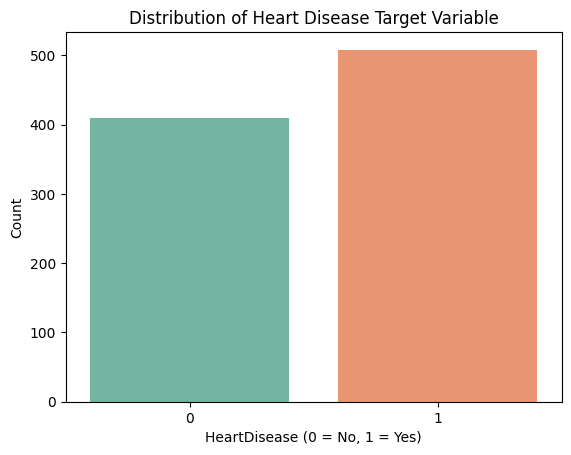

In [16]:
sns.countplot(data=dataset, x='HeartDisease', hue='HeartDisease', palette='Set2', legend=False)
plt.title('Distribution of Heart Disease Target Variable')
plt.xlabel('HeartDisease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#### 6. Apply dummy encoding to all categorical features in the dataset.


In [15]:
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()
dataset_encoded = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)
dataset_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


#### 7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?



In [9]:
corr_matrix = dataset_encoded.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.00,0.25,-0.10,0.20,-0.38,0.26,0.28,0.06,-0.22,-0.01,0.03,-0.23,0.14,0.22,0.19,-0.26
RestingBP,0.25,1.00,0.10,0.07,-0.11,0.16,0.11,0.01,-0.05,-0.04,0.05,-0.12,0.09,0.16,0.10,-0.10
Cholesterol,-0.10,0.10,1.00,-0.26,0.24,0.05,-0.23,-0.20,0.15,-0.01,0.02,-0.04,-0.13,-0.03,-0.05,0.09
FastingBS,0.20,0.07,-0.26,1.00,-0.13,0.05,0.27,0.12,-0.14,-0.04,0.03,-0.09,0.13,0.06,0.11,-0.16
MaxHR,-0.38,-0.11,0.24,-0.13,1.00,-0.16,-0.40,-0.19,0.25,0.13,0.10,0.02,-0.16,-0.37,-0.34,0.38
Oldpeak,0.26,0.16,0.05,0.05,-0.16,1.00,0.40,0.11,-0.26,-0.11,0.03,-0.12,0.06,0.41,0.28,-0.45
HeartDisease,0.28,0.11,-0.23,0.27,-0.40,0.40,1.00,0.31,-0.40,-0.21,-0.05,-0.09,0.10,0.49,0.55,-0.62
Sex_M,0.06,0.01,-0.20,0.12,-0.19,0.11,0.31,1.00,-0.16,-0.07,-0.00,-0.01,0.06,0.19,0.12,-0.15
ChestPainType_ATA,-0.22,-0.05,0.15,-0.14,0.25,-0.26,-0.40,-0.16,1.00,-0.26,-0.11,0.11,-0.05,-0.30,-0.30,0.36
ChestPainType_NAP,-0.01,-0.04,-0.01,-0.04,0.13,-0.11,-0.21,-0.07,-0.26,1.00,-0.12,0.01,-0.04,-0.17,-0.07,0.09


In [10]:
threshold = 0.5
target_corr = corr_matrix['HeartDisease']
columns_corr = target_corr[abs(target_corr) >= 0.5].drop('HeartDisease').index.to_list
print(columns_corr)

<bound method IndexOpsMixin.tolist of Index(['ST_Slope_Flat', 'ST_Slope_Up'], dtype='object')>


#### 8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?


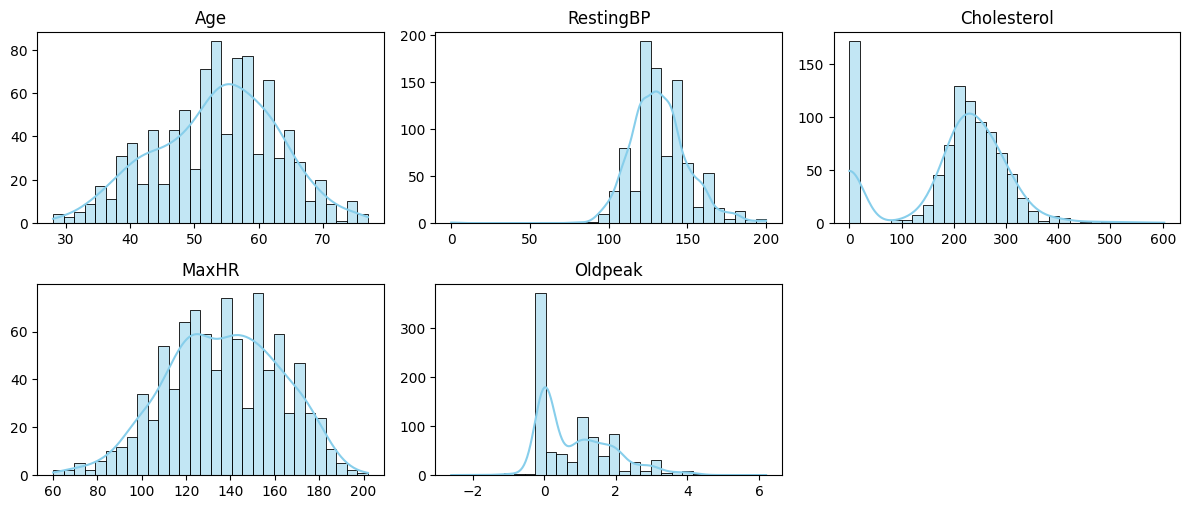

In [ ]:
binary_features = ['HeartDisease', 'FastingBS', 'ExerciseAngina']
non_binary_features = dataset.drop(columns=binary_features).select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 10))
for i, feature in enumerate(non_binary_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(dataset[feature], kde=True, color='skyblue', bins=30)
    plt.title(feature)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


#### 9. Split the data into a training and a testing set using a ratio of 0.3.


In [25]:
from sklearn.model_selection import train_test_split
X = dataset_encoded.drop('HeartDisease', axis=1)
y = dataset_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [26]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
76,32,118,529,0,130,0.0,True,False,False,False,True,False,False,True,False
48,36,112,340,0,184,1.0,True,False,True,False,True,False,False,True,False
304,51,95,0,1,126,2.2,True,False,False,False,True,False,False,True,False
263,59,130,126,0,125,0.0,True,False,False,False,True,False,False,True,False
744,60,117,230,1,160,1.4,True,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,54,110,239,0,126,2.8,True,False,False,False,True,False,True,True,False
192,48,130,245,0,160,0.0,True,True,False,False,True,False,False,False,True
629,57,128,303,0,159,0.0,False,False,False,False,False,False,False,False,True
559,64,134,273,0,102,4.0,True,False,False,False,True,False,True,False,False


In [27]:
X_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
306,55,115,0,1,155,0.1,True,False,False,False,True,False,False,True,False
711,66,120,302,0,151,0.4,True,False,False,False,False,False,False,True,False
298,51,110,0,1,92,0.0,True,False,False,False,True,False,False,True,False
466,55,120,0,0,125,2.5,True,False,True,False,False,True,True,True,False
253,62,140,271,0,152,1.0,True,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,41,110,289,0,170,0.0,True,False,False,False,True,False,False,True,False
456,61,120,0,0,80,0.0,True,False,True,False,True,False,True,True,False
342,61,110,0,1,113,1.4,True,False,False,False,True,False,False,True,False
907,44,120,169,0,144,2.8,True,False,False,False,True,False,True,False,False


#### 10. Normalize the data using z-score scaling.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_scale = X.select_dtypes(include=['int64', 'float64']).columns
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.fit_transform(X_test[features_to_scale])

In [31]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
76,-2.285349,-0.789196,3.078139,-0.520852,-0.285721,-0.840524,True,False,False,False,True,False,False,True,False
48,-1.861947,-1.108119,1.306516,-0.520852,1.839893,0.104348,True,False,True,False,True,False,False,True,False
304,-0.274189,-2.011737,-1.880529,1.919930,-0.443173,1.238194,True,False,False,False,True,False,False,True,False
263,0.572615,-0.151348,-0.699448,-0.520852,-0.482537,-0.840524,True,False,False,False,True,False,False,True,False
744,0.678466,-0.842349,0.275413,1.919930,0.895176,0.482297,True,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.043362,-1.214427,0.359776,-0.520852,-0.443173,1.805117,True,False,False,False,True,False,True,True,False
192,-0.591741,-0.151348,0.416018,-0.520852,0.895176,-0.840524,True,True,False,False,True,False,False,False,True
629,0.360914,-0.257656,0.959691,-0.520852,0.855813,-0.840524,False,False,False,False,False,False,False,False,True
559,1.101868,0.061268,0.678481,-0.520852,-1.387891,2.938963,True,False,False,False,True,False,True,False,False


In [33]:
X_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
306,0.178481,-0.922579,-1.690046,1.607612,0.753937,-0.721933,True,False,False,False,True,False,False,True,False
711,1.351359,-0.640407,0.933159,-0.622041,0.597157,-0.445064,True,False,False,False,False,False,False,True,False
298,-0.248020,-1.204751,-1.690046,1.607612,-1.715353,-0.814222,True,False,False,False,True,False,False,True,False
466,0.178481,-0.640407,-1.690046,-0.622041,-0.421915,1.493020,True,False,True,False,False,True,True,True,False
253,0.924858,0.488280,0.663889,-0.622041,0.636352,0.108674,True,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,-1.314272,-1.204751,0.820239,-0.622041,1.341864,-0.814222,True,False,False,False,True,False,False,True,False
456,0.818233,-0.640407,-1.690046,-0.622041,-2.185694,-0.814222,True,False,True,False,True,False,True,True,False
342,0.818233,-1.204751,-1.690046,1.607612,-0.892256,0.477833,True,False,False,False,True,False,False,True,False
907,-0.994397,-0.640407,-0.222094,-0.622041,0.322791,1.769889,True,False,False,False,True,False,True,False,False


### Data training and performance evaluation

<div class="alert alert-block alert-danger"> 
    
1. Train the following algorithms on the generated training dataset: Gaussian Naive Bayes, KNN(K=3), and decision tree (max_depth=6).
2. Display and save the tree generated by the decision tree algorithm.
3. Implement the SVM algorithm from scratch and apply it to the dataset.
4. Print the classification reports and confusion matrices of all models on the testing set. Discuss the obtained results.
5. Display the ROC curves of the generated models in one plot.
6. Which evaluation metric do you recommend for this dataset?
7. Predict the class of the third sample from the testing set based on the best-performing model.
8. Perform the cross-validation evaluation method on the best model based on the selected metric.
</div>

#### 1. Train the following algorithms on the generated training dataset: Gaussian Naive Bayes, KNN(K=3), and decision tree (max_depth=6).


##### A. Gaussian Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb 

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [35]:
gnb.score(X_test, y_test)

0.8442028985507246

##### B. KNN ( K=3 )

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [37]:
knn.score(X_test, y_test)

0.8405797101449275

##### C. decision tree (max_depth=6)

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [39]:
dt.score(X_test, y_test)

0.8514492753623188

#### 2. Display and save the tree generated by the decision tree algorithm.


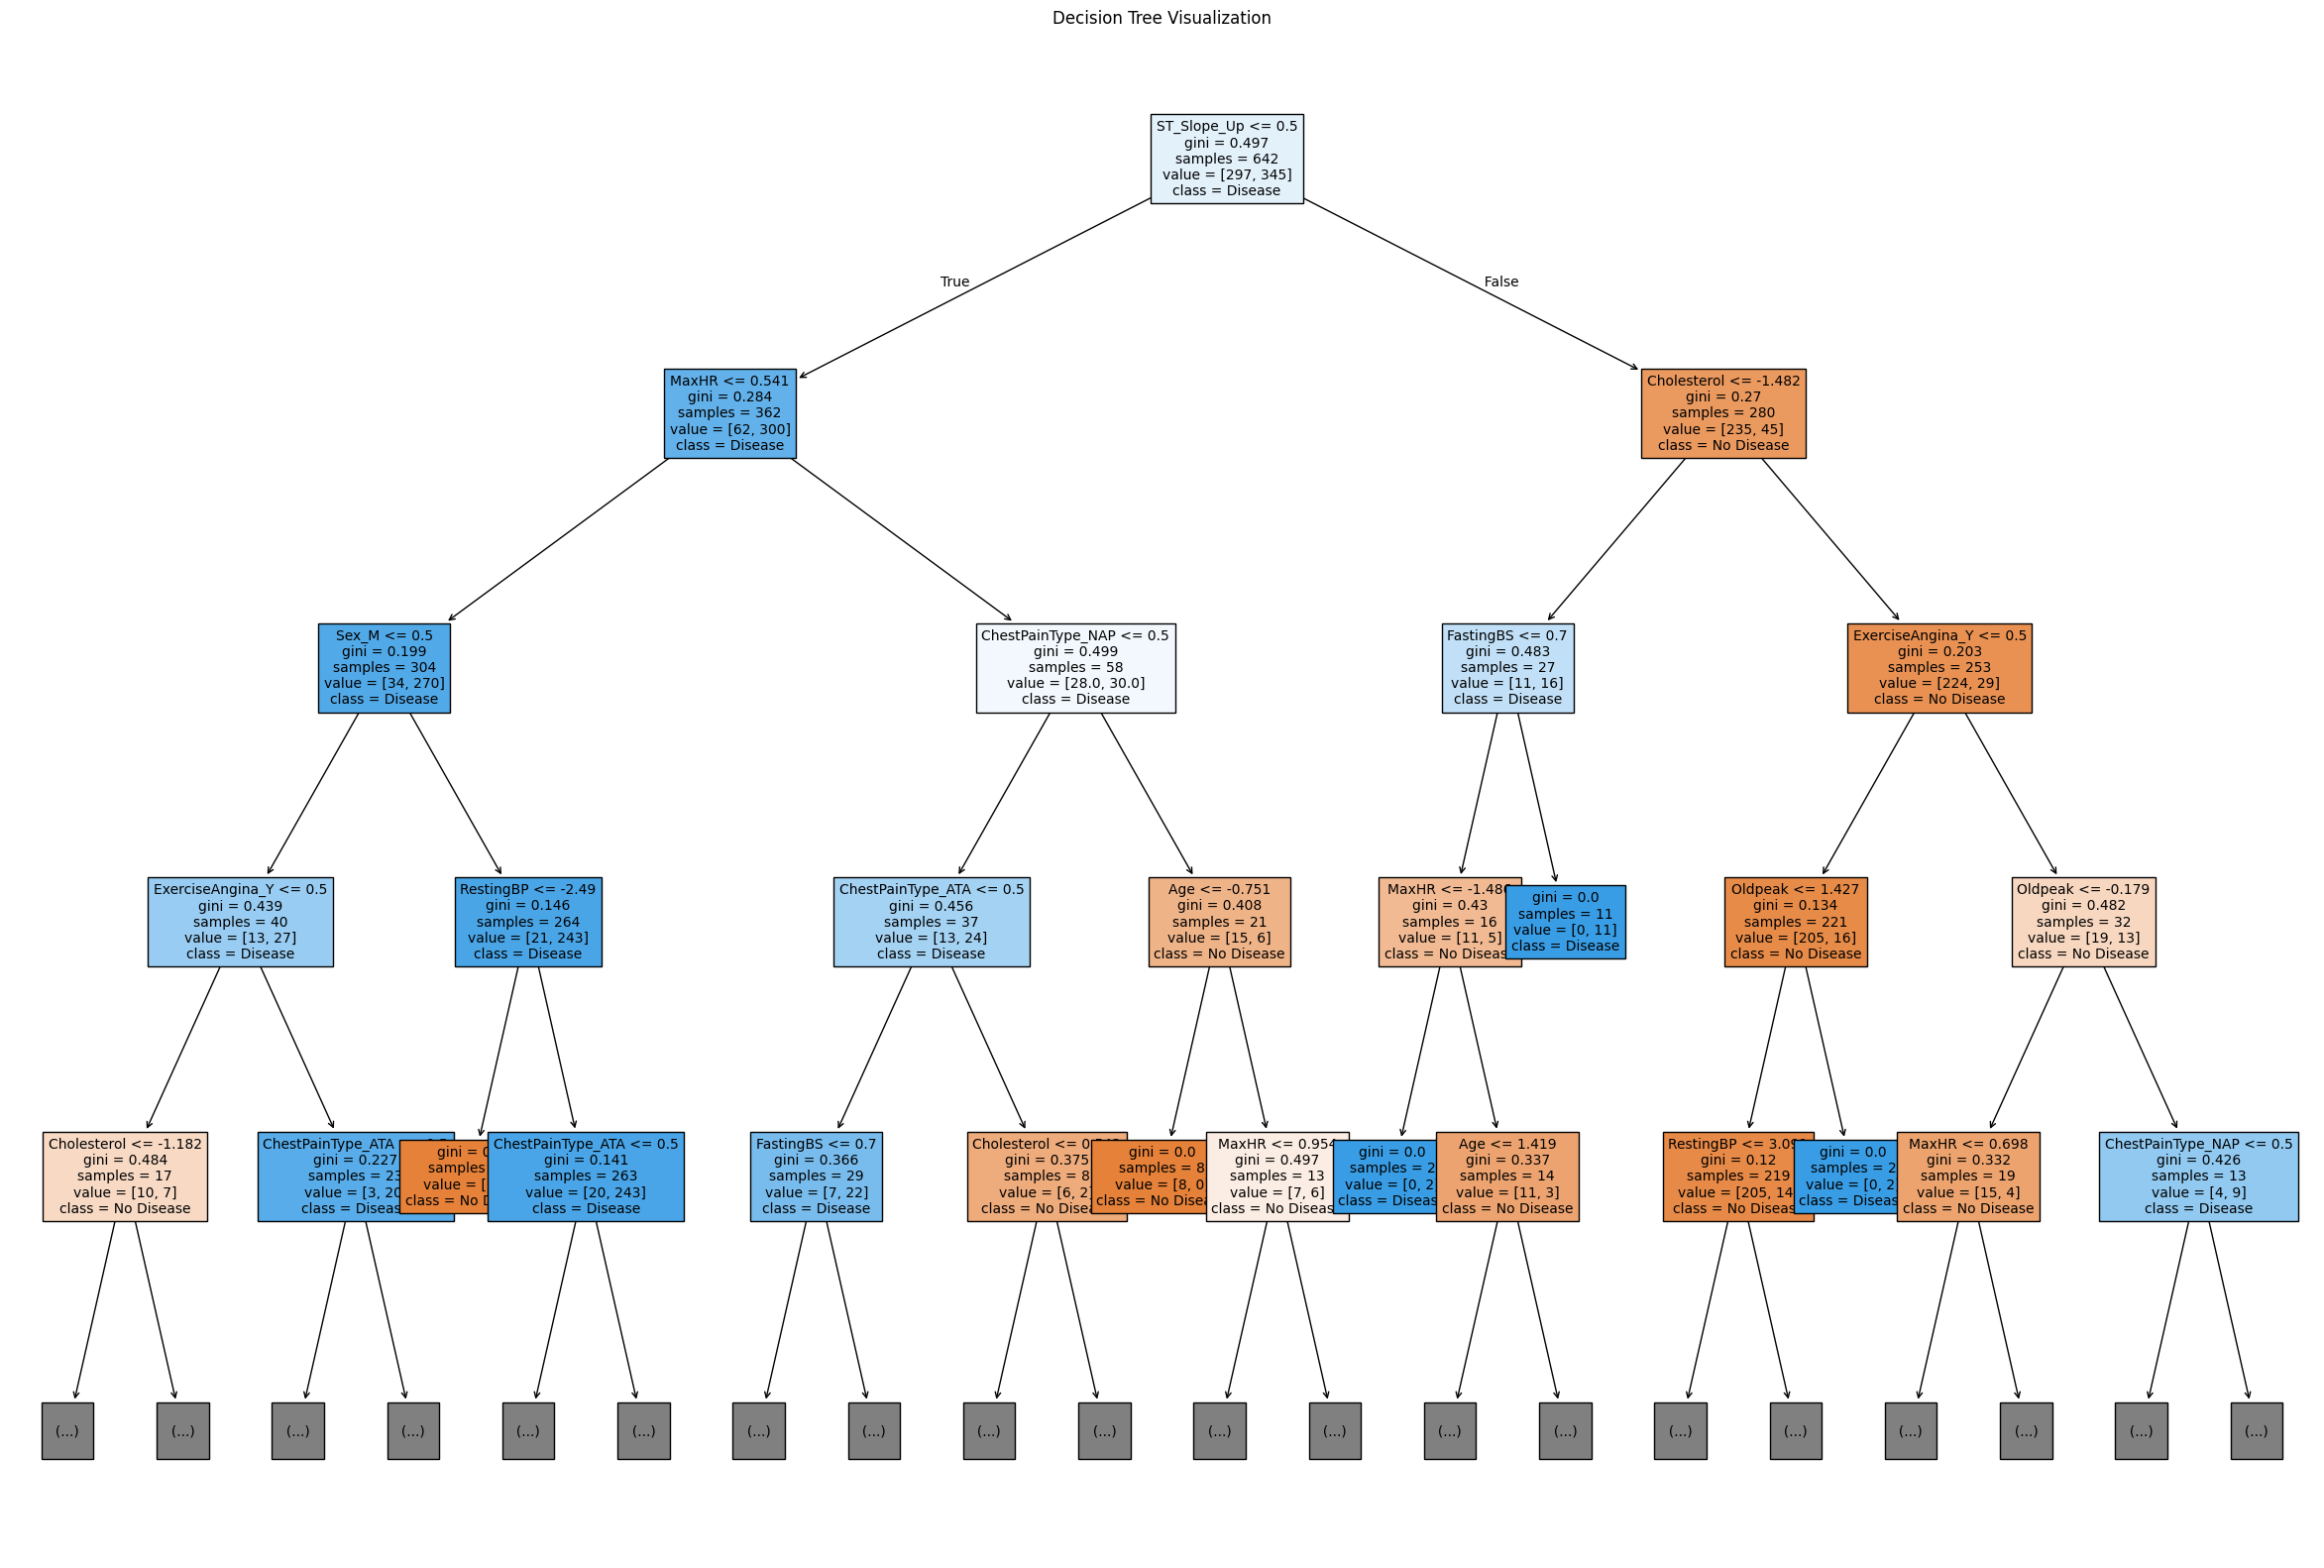

In [44]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 20))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, fontsize=10, max_depth=4)
plt.title("Decision Tree Visualization")
plt.savefig("decision_tree.png")
plt.show()

#### 3. Implement the SVM algorithm from scratch and apply it to the dataset.


In [ ]:
import numpy as np
class SVM:
    """
    Support Vector Machine (SVM) with a linear kernel implemented from scratch.

    Parameters:
    -----------
    learning_rate : float
        Learning rate for gradient descent optimization (default=0.001).
    lambda_param : float
        Regularization parameter to prevent overfitting (default=0.01).
    n_iters : int
        Number of iterations for training (default=1000).

    Attributes:
    -----------
    w : ndarray
        Weight vector for the linear decision boundary.
    b : float
        Bias term for the decision boundary.

    Methods:
    --------
    fit(X, y):
        Trains the SVM model using gradient descent.
    predict(X):
        Predicts the labels for the given input samples.
    score(X, y):
        Evaluates the accuracy of the model on the given data.
    """

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        """
        Trains the SVM model using gradient descent.

        Parameters:
        -----------
        X : ndarray
            Input features, shape (n_samples, n_features).
        y : ndarray
            Target labels, shape (n_samples,). Labels must be binary (-1 and 1).

        Returns:
        --------
        None
        """
        # Convert labels to -1 and 1
        y_ = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Check the SVM condition: y_i * (w.x + b) >= 1
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # Update only regularization term
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Update both regularization and hinge loss terms
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        """
        Predicts the labels for the given input samples.

        Parameters:
        -----------
        X : ndarray
            Input features, shape (n_samples, n_features).

        Returns:
        --------
        predictions : ndarray
            Predicted labels for the input samples, shape (n_samples,).
        """
        # Compute the decision boundary
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

    def score(self, X, y):
        """
        Evaluates the accuracy of the model on the given data.

        Parameters:
        -----------
        X : ndarray
            Input features, shape (n_samples, n_features).
        y : ndarray
            True labels, shape (n_samples,).

        Returns:
        --------
        accuracy : float
            Accuracy of the model, defined as the proportion of correct predictions.
        """
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy



1. **Parameters**:

- `learning_rate`: Controls the step size for gradient descent.
- `lambda_param`:  Regularization parameter to penalize large weights.
- `n_iters`: Number of iterations for gradient descent.

2. **Attributes**:

- `w` : The weight vector, determining the hyperplane.
- `b` : The bias term, determining the offset of the hyperplane.

3. **Methods**:

- `fit(X, y)`: Trains the model using the gradient descent approach. Ensures the decision boundary separates the classes while minimizing the regularization and hinge loss.
- `predict(X)`: Classifies samples using the learned hyperplane. Returns -1 or 1 for each sample.
- `score`: Evaluates the accuracy of the model on the given data.

4. **Implementation Details**:
- Hinge loss ensures misclassified samples are penalized.	
- Regularization term avoids overfitting by constraining weight magnitude.
- Assumes the labels `y` are -1 and 1 for binary classification.





#### 4. Print the classification reports and confusion matrices of all models on the testing set. Discuss the obtained results.


#### 5. Display the ROC curves of the generated models in one plot.


#### 6. Which evaluation metric do you recommend for this dataset?


#### 7. Predict the class of the third sample from the testing set based on the best-performing model.


#### 8. Perform the cross-validation evaluation method on the best model based on the selected metric.